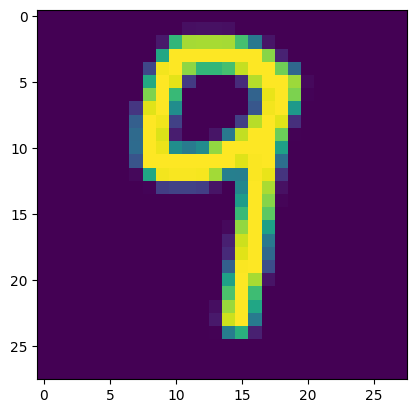

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load image with PiL 
    img = Image.open(image_path).convert('L')  # greyscale
    
    # Resize 28*28
    img = img.resize((28, 28))
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Invert to black number - white background => white number, black background
    img_array = 255 - img_array
    
    # Normalisation
    img_array = img_array / 255.0
    # reshape to modell
    img_tensor = img_array.reshape(1, 28, 28, 1)
    
    # Print image 
    import matplotlib.pyplot as plt 
    plt.imshow(img_tensor[0]) 
    plt.show() 
    
preprocess_image('9_6.png')

In [ ]:

%pip install visualkeras

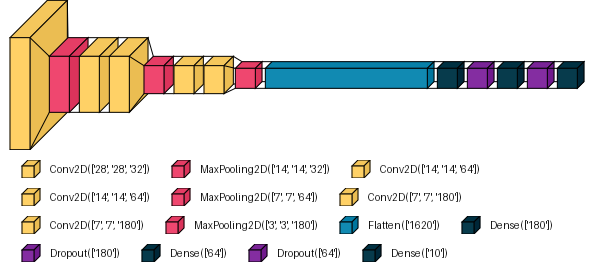

In [ ]:

import visualkeras
from PIL import ImageFont
from tensorflow.keras.models import load_model


model = load_model('number_recognition_model_noisy_5.h5') 

visualkeras.layered_view(model)
visualkeras.layered_view(model)

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

visualkeras.layered_view(model, legend=True, show_dimension=True) #layer dimmesion



Getting names of the layers of CNN (analyticsvidhya)

In [12]:
model = load_model('number_recognition_model_noisy_5.h5') 

layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_70',
 'max_pooling2d_42',
 'conv2d_71',
 'conv2d_72',
 'max_pooling2d_43',
 'conv2d_73',
 'conv2d_74',
 'max_pooling2d_44',
 'flatten_14',
 'dense_43',
 'dropout_29',
 'dense_44',
 'dropout_30',
 'dense_45']

Checking the layers:

In [20]:
model.layers


[<Conv2D name=conv2d_70, built=True>,
 <MaxPooling2D name=max_pooling2d_42, built=True>,
 <Conv2D name=conv2d_71, built=True>,
 <Conv2D name=conv2d_72, built=True>,
 <MaxPooling2D name=max_pooling2d_43, built=True>,
 <Conv2D name=conv2d_73, built=True>,
 <Conv2D name=conv2d_74, built=True>,
 <MaxPooling2D name=max_pooling2d_44, built=True>,
 <Flatten name=flatten_14, built=True>,
 <Dense name=dense_43, built=True>,
 <Dropout name=dropout_29, built=True>,
 <Dense name=dense_44, built=True>,
 <Dropout name=dropout_30, built=True>,
 <Dense name=dense_45, built=True>]

Output of the layers

TensorFlow version: 2.19.0
Model type: Sequential
Layer name: conv2d_70, type: Conv2D


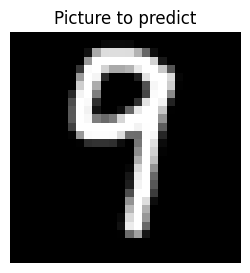

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Feature map shape: (1, 28, 28, 32)


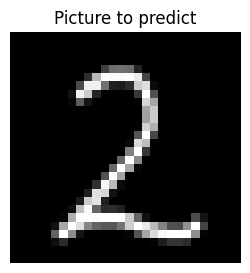

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Layer 0 (conv2d_70) feature map shape: (1, 28, 28, 32)


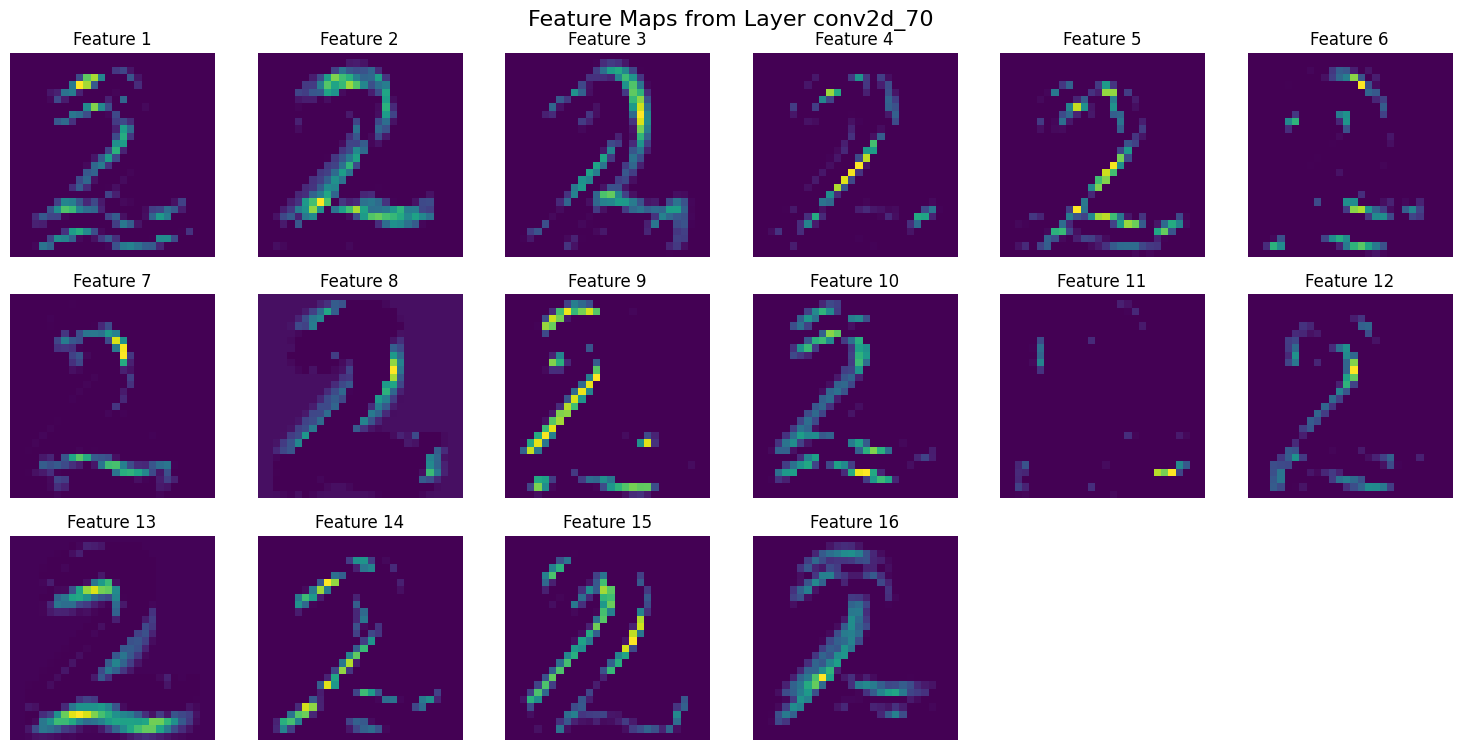

Layer 1 (max_pooling2d_42) feature map shape: (1, 14, 14, 32)


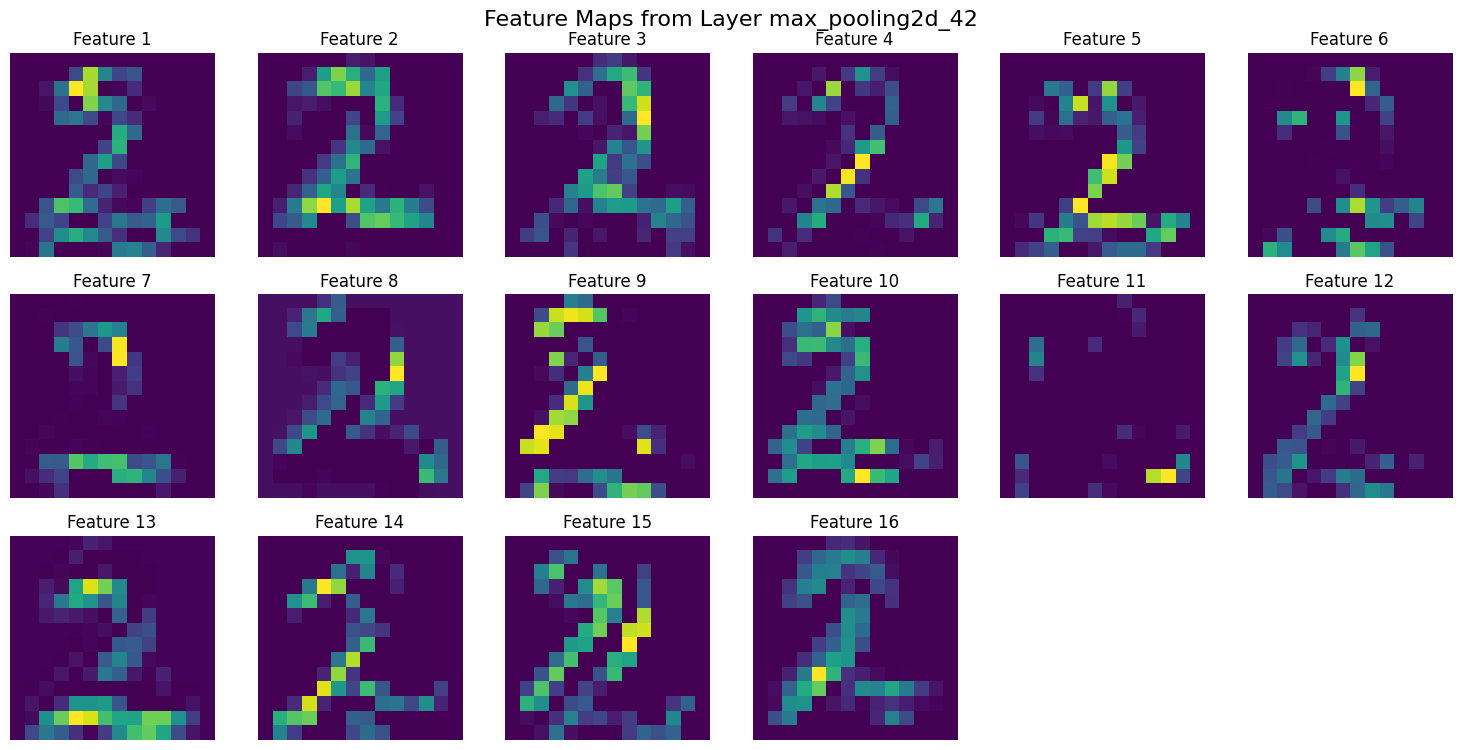

Layer 2 (conv2d_71) feature map shape: (1, 14, 14, 64)


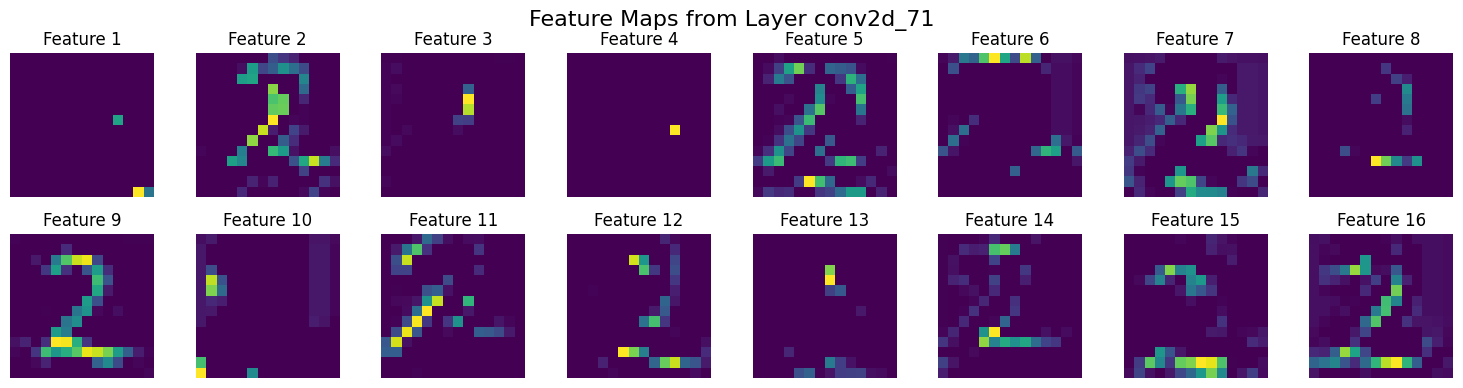

Layer 3 (conv2d_72) feature map shape: (1, 14, 14, 64)


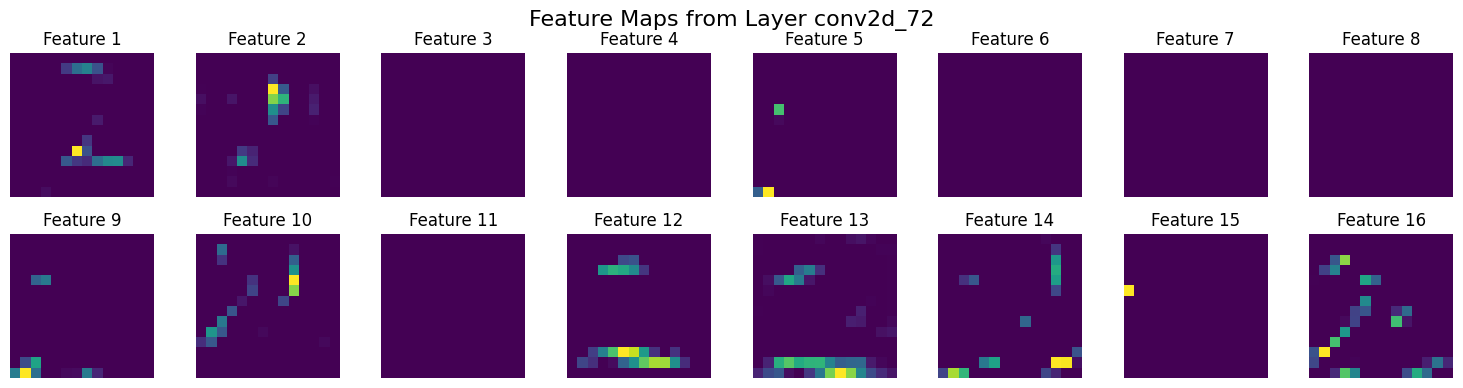

Layer 4 (max_pooling2d_43) feature map shape: (1, 7, 7, 64)


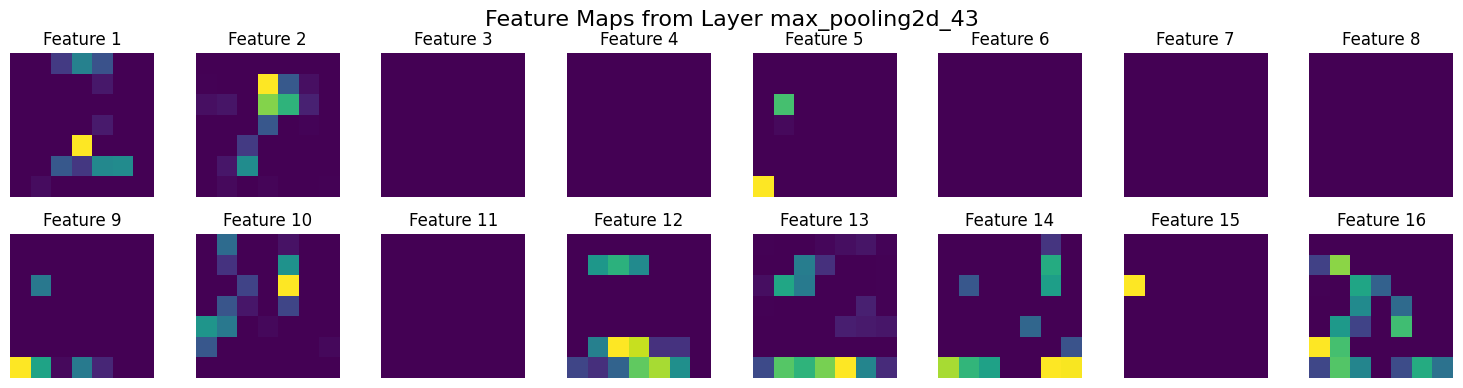

In [53]:
# Check TensorFlow version
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Check model type
print(f"Model type: {type(model).__name__}")

# Create an input layer
input_tensor = tf.keras.layers.Input(shape=(28, 28, 1))

# Select a layer (e.g., the first convolutional layer)
layer_index = 0  # Change this index for different layers

# Extract the layer
layer = model.layers[layer_index]
print(f"Layer name: {layer.name}, type: {type(layer).__name__}")

# Create a new model that works with the new input and the output of the selected layer
x = input_tensor
for i in range(layer_index + 1):
    x = model.layers[i](x)
    
one_layer_model = tf.keras.Model(inputs=input_tensor, outputs=x)

# Test with an actual image
feature_map = one_layer_model.predict(preprocess_image('9_6.png'))
print(f"Feature map shape: {feature_map.shape}")

# Create a model from scratch for visualization
input_shape = (28, 28, 1)  # Typical MNIST size
inputs = tf.keras.layers.Input(shape=input_shape)

import matplotlib.pyplot as plt

# A második megközelítés működött, így folytassuk ezzel
def visualize_feature_maps(feature_maps, layer_names):
    for i, feature_map in enumerate(feature_maps):
        print(f"Layer {i} ({layer_names[i]}) feature map shape: {feature_map.shape}")
        
        # Csak az első kép feature map-jeit vizualizáljuk (batch méret = 1)
        fmap = feature_map[0]
        
        # Határozzuk meg a megjelenítési rácsot
        n_features = fmap.shape[-1]  # Csatornák száma
        grid_size = int(np.ceil(np.sqrt(n_features)))
        
        # Készítsünk egy rácsot a feature map-ek megjelenítéséhez
        fig = plt.figure(figsize=(15, 15))
        
        # Megjeleníti az első néhány feature map-et (max 16-ot vagy amennyit kérünk)
        max_features = min(16, n_features)
        for j in range(max_features):
            plt.subplot(grid_size, grid_size, j+1)
            
            # Normalizálás a jobb vizualizáció érdekében
            img = fmap[:, :, j]
            img = (img - img.min()) / (img.max() - img.min() + 1e-8)  # Elkerüljük a nullával osztást
            
            plt.imshow(img, cmap='viridis')
            plt.title(f'Feature {j+1}')
            plt.axis('off')
        
        plt.suptitle(f"Feature Maps from Layer {layer_names[i]}", fontsize=16)
        plt.tight_layout()
        plt.show()

# Add layers
x = inputs
outputs = []

# Number of layers to visualize
num_layers_to_visualize = 5  # E.g., first 5 layers

for i in range(min(num_layers_to_visualize, len(model.layers))):
    layer = model.layers[i]
    x = layer(x)
    outputs.append(x)

# Create the model
extended_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Test with an actual image
more_feature_maps = extended_model.predict(preprocess_image('2.png'))

# Visualize the results
layer_names = [model.layers[i].name for i in range(min(num_layers_to_visualize, len(model.layers)))]
visualize_feature_maps(more_feature_maps, layer_names)